# 목차

**I. 소개**

1. 연구 배경
2. 연구 목적

**II. 내국인관광객 카드 데이터 분석**

1. 데이터 수집 및 전처리
2. 군집분석 및 시각화
3. 결론

**III. 버스정류장 데이터 분석**

1. 데이터 전처리
2. 시각화
3. 군집분석
4. 결론

**IV. 렌트카 이동경로 데이터 분석**

1. 데이터 수집 및 전처리
2. 시각화
3. 결론

**V. 제주도 맛집 데이터 분석**

1. 데이터 전처리
2. 시각화
3. 결론

**VI. 결론**

1. 데이터 분석 결과 정리
2. 활용방안 및 기대효과



# I. 소개

## 1. 연구 배경

2021년 제주 방문관광객 실태조사에서 다음과 같은 정보를 얻을 수 있다.

우선 제주도 방문관광객들의 제주 여행시 필요한 정보 1순위 중 이동 거리 및  교통편이 17.1%로 높은 편에 속하는 것을 볼 수 있다.

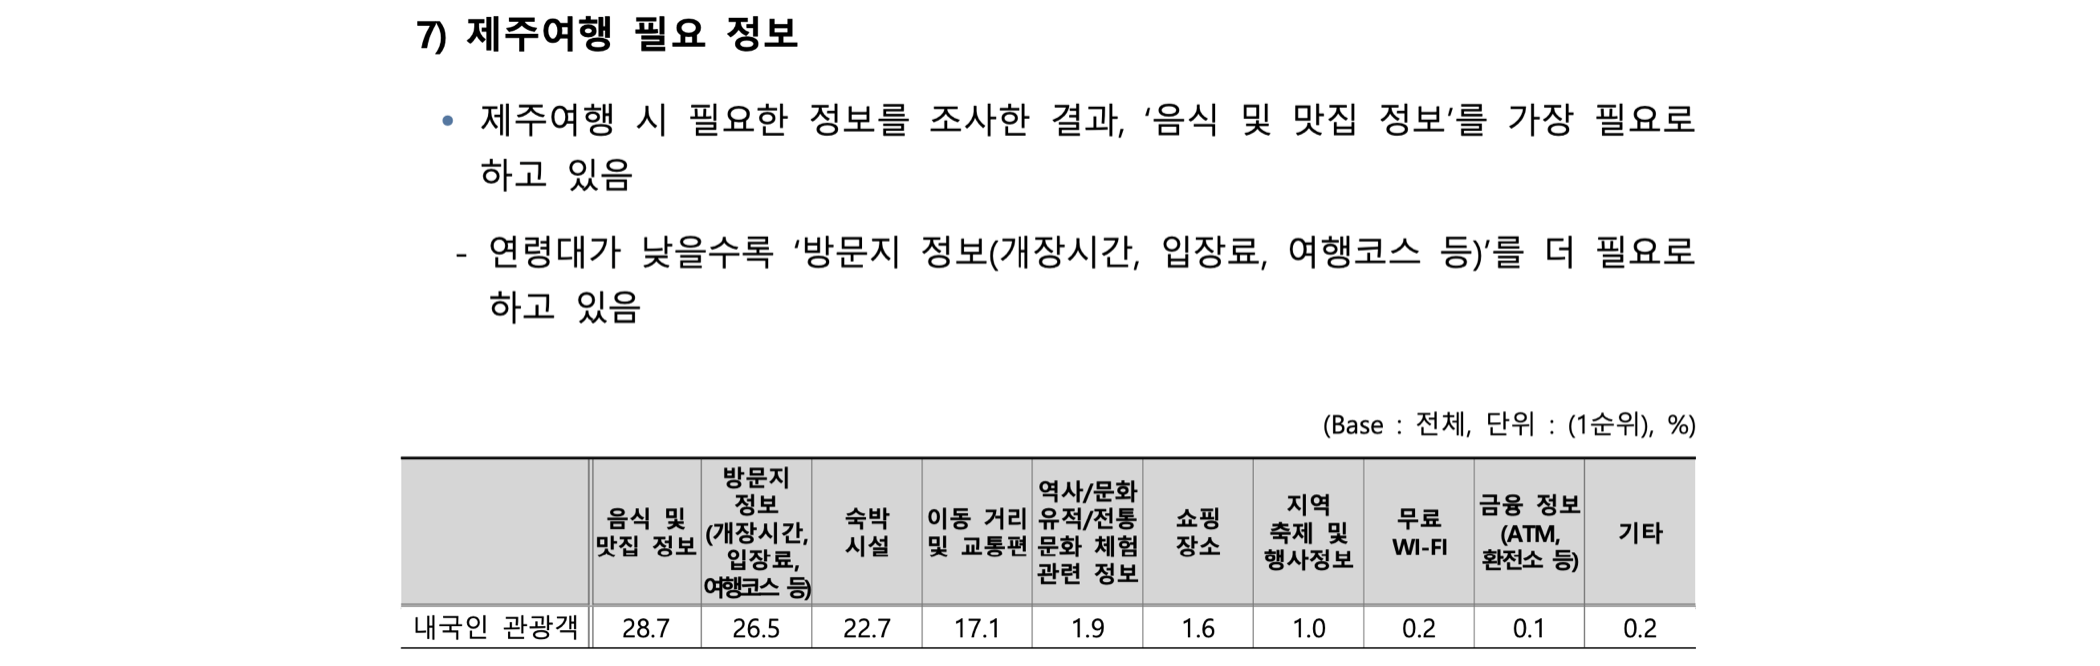

그림 출처: 2021년 제주 방문관광객 실태조사

또한 제주도 방문관광객들의 주 이용 교통수단이 렌트카로 무려 73.8%인 것을 볼 수 있다. 하지만 버스는 6.7% 밖에 되지를 않는다.

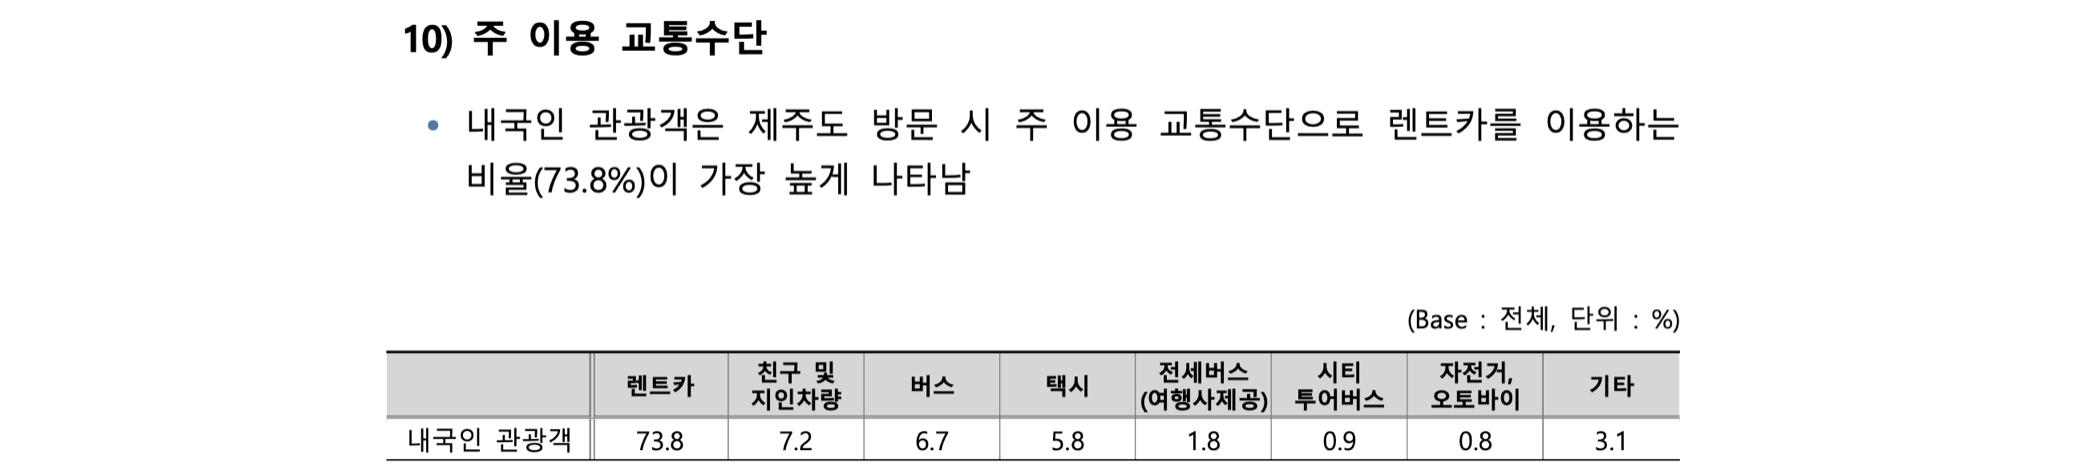

이를 통해서 제주도 방문관광객들이 제주 여행시 교통편에 대해 많이 관심이 있는데, 거의 대부분이 버스를 타지 않고 결국엔 렌트카를 빌리게 된다는 것이다. 하지만 렌트카를 빌리는 비용은 다음 기사들처럼 여행 경비에서 상당한 비중을 차지할 수 있다.

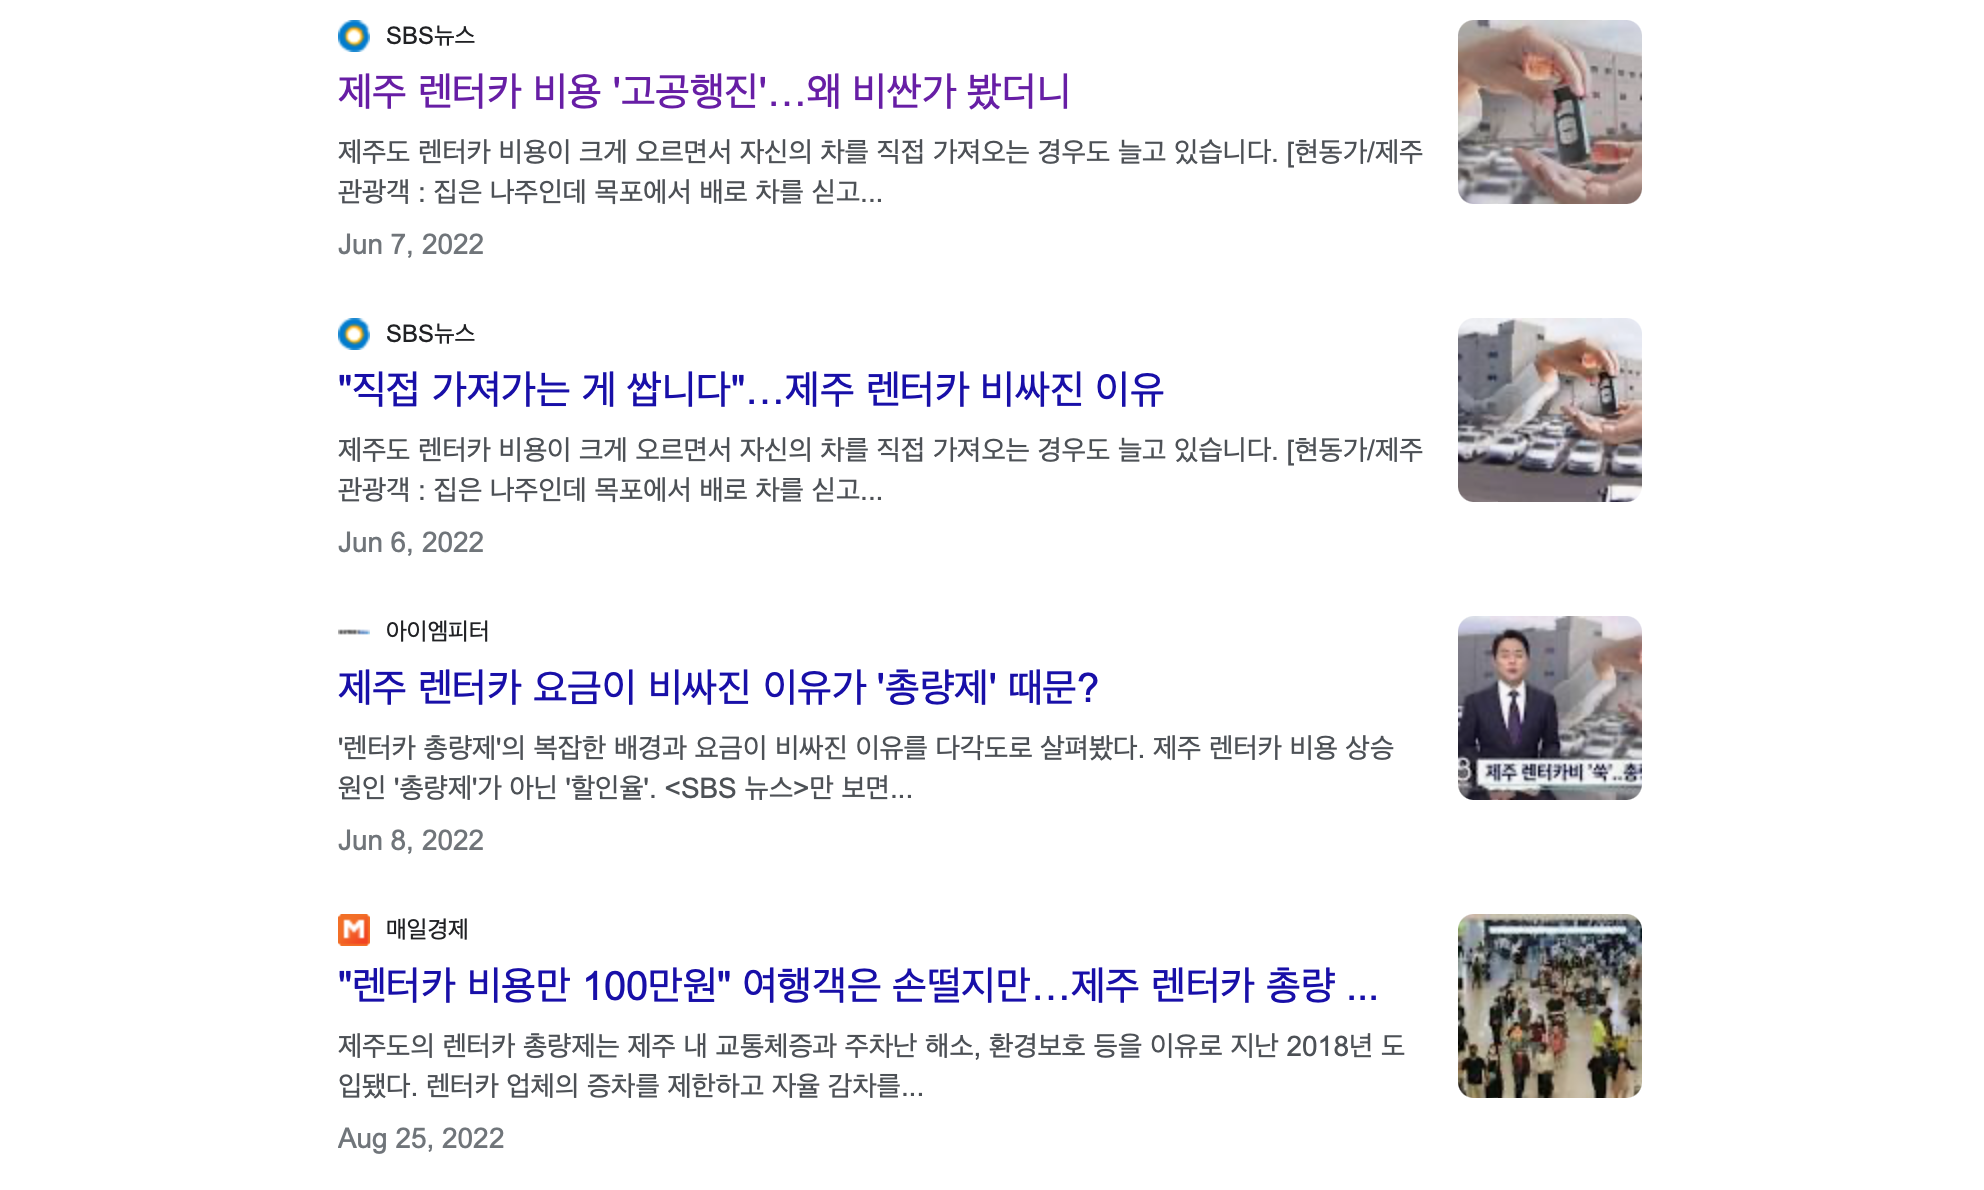

그림 출처: 구글 뉴스

마지막으로 제주도를 여행하는 데에 있어 30대 미만의 저 연령층은 타 연령층 대비 ‘음식/미식 탐방’을 매우 중요시하는 것을 알 수 있다.

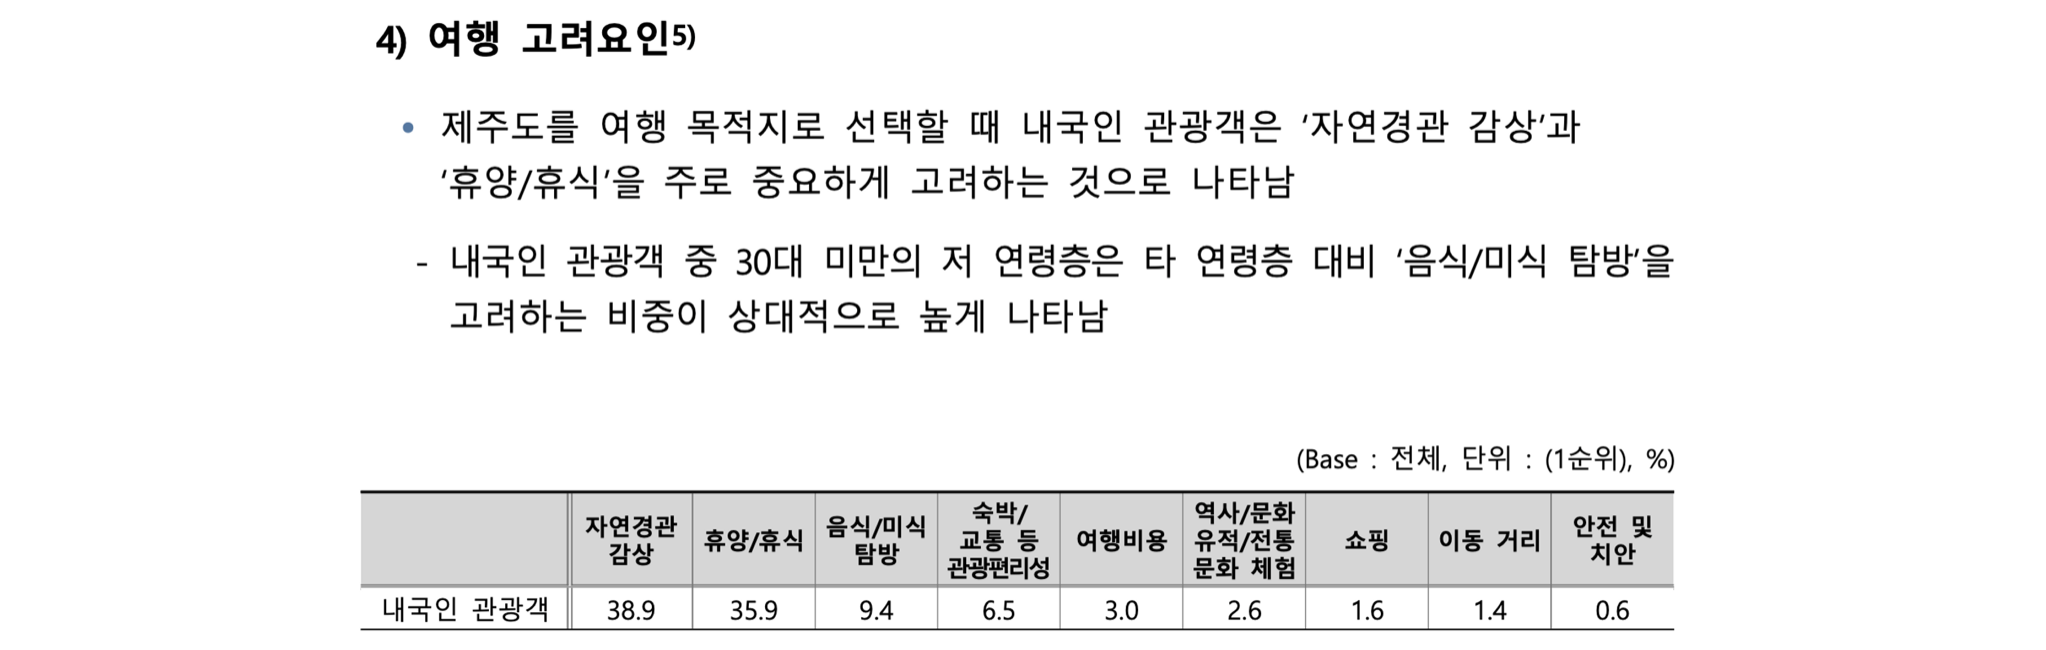

그림 출처: 2021년 제주 방문관광객 실태조사

본 팀은 이와 같이 렌트카를 탈 수 밖에 없는 제주도 관광의 문제점, 특히나 제주도 버스의 문제점에 대해 관심을 가지게 되었다. 관광객들이 비싼 렌트카를 빌리지 않아 절약한 경비는 여행 시 다른 데에서 쓰일 수 있다. 특히나 30대 미만의 연령층에서 ‘음식/미식 탐방’을 여행 고려요인으로 중요시하는 것을 보면 절약된 경비는 식음료업에서 쓰일 가능성이 높다.

## 2. 연구 목적

**제주도 여행시 렌트카 대안을 찾아 관광객들의 여행 경비를 줄이자! 절약된 경비는 다른 관광산업에 소비로 이어질 것이다.** 

*   제주도 내국인관광객 카드 데이터를 분석하여 관광객들이 주로 어디에 소비를 하는지를 연령대별로 알아보자
*   제주도 버스의 문제점을 버스정류장 데이터를 분석하여 알아보자
*   렌트카 이동경로를 분석하여 제주도에서 관광객들이 주로 어디로 이동하는지 알아보자
*   제주도의 음식점 데이터를 분석하여 맛집들이 주로 어디에 분포가 되어있는지를 알아보자

# II. 내국인관광객 카드 데이터 분석

**데이터 출처:** https://www.jejudatahub.net/data/view/data/597

Jeju datahub에서 제공하는 [“제주도의 내국인 관광객 지역, 업종, 성별, 연령대별 카드 이용 데이터”](https://www.jejudatahub.net/data/view/data/597)를 통해 제주도 내국인 관광객들의 소비 패턴을 분석하고자 jeju datahub의 API를 이용하여 데이터를 추출하였다 (아쉽게도 2016년 9월 ~ 2018년 12월 데이터만이 제공됨)

## 1. 데이터 수집 및 전처리

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

In [ ]:
import requests, bs4
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote
import json

# URL 파라미터 분리하기
xmlUrl = 'https://open.jejudatahub.net/api/proxy/5D5a577taba7tbb71at1b1bt9tatata9/'

My_API_Key = unquote('API KEY')

DF = pd.DataFrame()  # Dataframe to store all data

marketType_list = ['교통', '소매', '쇼핑', '숙박', '유흥', '문화/레져', '식음료']

sigungu_list = ['제주시', '서귀포시']

cityGubun_list = ['도심', '읍면']

endDate_list = ['201609','201610','201611','201612','201701','201702','201703','201704','201705','201706','201707',
                '201708','201709','201710','201711','201712','201801','201802','201803','201804','201805','201806',
                '201807','201808','201809','201810','201811','201812']

for marketType in tqdm(marketType_list):
  for sigungu in sigungu_list:
    for cityGubun in cityGubun_list:
      for endDate in endDate_list:
        queryParams = '?' + urlencode(    # get 방식으로 쿼리를 분리하기 위해 '?'를 넣은 것이다. 메타코드 아님.
            {
                quote_plus('startDate') : '201609',
                quote_plus('endDate') : endDate,
                quote_plus('sigungu') : sigungu,
                quote_plus('cityGubun'): cityGubun,
                quote_plus('userType') : '내국인관광객',
                quote_plus('marketType') : marketType
            }
        )

        response = requests.get(xmlUrl + My_API_Key + queryParams).text.encode('utf-8')
        xmlobj = bs4.BeautifulSoup(response, 'html.parser')
        xmlobj_str = str(xmlobj)
        raw_json = json.loads(xmlobj_str)
        raw_data = raw_json['data']

        for item in raw_data:
          DF = DF.append(pd.DataFrame([item])).reset_index(drop=True)

100%|██████████| 7/7 [11:30<00:00, 98.68s/it]


In [ ]:
DF

sido sigungu cityGubun marketType userType ageGroup gender dtYearMonth  \
0     제주도     제주시        도심         교통   내국인관광객    60대이상      여      201609   
1     제주도     제주시        도심         교통   내국인관광객    60대이상      남      201609   
2     제주도     제주시        도심         교통   내국인관광객      50대      여      201609   
3     제주도     제주시        도심         교통   내국인관광객      50대      남      201609   
4     제주도     제주시        도심         교통   내국인관광객      40대      여      201609   
...   ...     ...       ...        ...      ...      ...    ...         ...   
7835  제주도    서귀포시        읍면        식음료   내국인관광객      40대      남      201812   
7836  제주도    서귀포시        읍면        식음료   내국인관광객      30대      여      201812   
7837  제주도    서귀포시        읍면        식음료   내국인관광객      30대      남      201812   
7838  제주도    서귀포시        읍면        식음료   내국인관광객    20대미만      여      201812   
7839  제주도    서귀포시        읍면        식음료   내국인관광객    20대미만      남      201812   

      userCount  useCount    useCost  
0          1186      1524  114798442  
1          2641      3398  252053548  
2          2980      3740  287134905  
3          5592      7093  514424651  
4          4682      5860  453708282  
...         ...       ...        ...  
7835       6278     10226  381165486  
7836       6356      9457  292058067  
7837       7074     10940  353643467  
7838        194       284    5451330  
7839        150       237    4780450  

[7840 rows x 11 columns]

In [ ]:
dir = '/content/drive/MyDrive/Jeju Data Analysis/DATA/'
DF.to_csv(dir+'jeju_tourist_card_data.csv', encoding='utf-8', index=False)

In [ ]:
# 데이터 불러오기 및 간단한 정제

DATA = pd.read_csv('/content/drive/MyDrive/Jeju Data Analysis/DATA/jeju_tourist_card_data.csv')
DATA['dtYearMonth'] = pd.to_datetime(DATA['dtYearMonth'], format='%Y%m', errors='coerce').dropna()  # to datetime format
DATA['avgCost'] = round(DATA['useCost']/DATA['userCount'])  # 해당 연령대와 성별 그룹의 평균 이용금액(=총이용금액/이용고객수); 소수점 위로 올림
DATA['avgCost'] = DATA['avgCost'].astype(int)  # 데이터타입은 정수로
DATA = DATA[DATA['ageGroup']!='20대미만']  # 20대 미만은 관심 연령대가 아님

본 팀은 시군구, 도시구분, 성별에 따른 이용금액에 대해 관심이 없어 이들을 groupby로 묶어 합산을 한 aggregated data를 활용하였다.

이어서 본 팀은 해당 이용시장에서 쓰인 총 금액을 총 이용고객수로 나누어 "평균이용금액"이라는 변수를 생성하여 활용하였다.

In [ ]:
# Aggregated data by marketType and dtYearMonth (so adding by sigungu, cityGubun, and gender)
agg_DATA = DATA.groupby(['marketType', 'ageGroup', 'dtYearMonth']).sum()
agg_DATA['avgCost'] = round(agg_DATA['useCost']/agg_DATA['userCount'])  # 해당 이용시장과 연령대의 평균이용금액(=총이용금액/이용고객수); 소수점 위로 올림
agg_DATA['avgCost'] = agg_DATA['avgCost'].astype(int)  # 데이터타입은 정수로
agg_DATA = agg_DATA.reset_index()

In [ ]:
agg_DATA

marketType ageGroup dtYearMonth  userCount  useCount     useCost  avgCost
0           교통      20대  2016-09-01      17069     19573   914534695    53579
1           교통      20대  2016-10-01      14395     16826   867898227    60292
2           교통      20대  2016-11-01      13696     16141   967987781    70677
3           교통      20대  2016-12-01      16179     19196  1248136374    77145
4           교통      20대  2017-01-01      15902     18865  1325270800    83340
..         ...      ...         ...        ...       ...         ...      ...
902         유흥    60대이상  2018-08-01        547       753    98334750   179771
903         유흥    60대이상  2018-09-01        576       789   130342650   226289
904         유흥    60대이상  2018-10-01        633       848   130031805   205421
905         유흥    60대이상  2018-11-01        694       900   135576600   195355
906         유흥    60대이상  2018-12-01        628       836   127625650   203226

[907 rows x 7 columns]

## 2. 군집분석 및 시각화

본 팀은 시계열 자료인 평균이용금액을 각 카드이용시장에서 연령대별로 군집화하여 어느 연령대끼리 비슷한 소비패턴을 보이는지를 파악하고 이를 시각화하였다.

본 팀은 군집화를 위해 tslearn 패키지에서 제공하는 TimeSeriesKMeans 모형을 사용하였다. Kmeans는 대표적인 거리 기반의 군집화 알고리즘으로 데이터를 각각 가장 가까운 k개의 평균 중 하나로 군집시킨다. 시계열 자료를 다루는 경우 주로 dynamic time warping (DTW)으로 거리를 측정한다. Kmeans는 간단하며 군집의 수인 k와 거리를 측정하는 방법 외에는 조정할 것이 별로 없다.

본 팀은 연령대가 총 5개 밖에 안된다는 점과 평균이용금액이 높은 군집과 낮은 군집에 관심이 있다는 점 때문에 k=2로 정하고 군집분석을 수행하였다.

In [ ]:
! pip install tslearn  # 시계열 군집분석 패키지

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline

from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

In [ ]:
# 그림에서 한글 깨짐 방지용

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [ ]:
# 연령대

ageGroup = list(agg_DATA['ageGroup'].unique())
ageGroup

['20대', '30대', '40대', '50대', '60대이상']

In [ ]:
# 카드이용시장

marketType = list(agg_DATA['marketType'].unique())
marketType

['교통', '문화/레져', '소매', '쇼핑', '숙박', '식음료', '유흥']

In [ ]:
# 군집분석

km_list = []  # 모형들 저장할 리스트
pred_list = []  # 클러스터링 결과들 저장할 리스트

for market in marketType:
  avgCost_list = []  # 해당 시장의 연령대별별 평균지출액 시계열을을 담을 리스트

  for age in ageGroup:  # 연령대별로
    avgCost_list.append(list(agg_DATA[(agg_DATA['marketType']==market) & (agg_DATA['ageGroup']==age)]['avgCost']))

  X = to_time_series_dataset(avgCost_list)  # tslearn 패키지의 모델에 사용될 데이터 형태를 구축하기 위함

  km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, random_state=0)  # 총 군집의 수는 2개로
  pred = km.fit_predict(X)  # 데이터에 fit을 한 후 데이터에 클러스터링을 함

  pred_list.append(pred)  # saving the result of clustering for visualization
  km_list.append(km)  # saving the trained model for visualization
  
  print(f'{market}에 대한 클러스터링 결과:\n'
        f'20대: 군집 {pred[0]} / 30대: 군집 {pred[1]} / 40대: 군집 {pred[2]} / 50대: 군집 {pred[3]} / 60대이상: 군집 {pred[4]}\n')

교통에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 0 / 40대: 군집 0 / 50대: 군집 0 / 60대이상: 군집 0

문화/레져에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 1 / 50대: 군집 0 / 60대이상: 군집 0

소매에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 1 / 50대: 군집 0 / 60대이상: 군집 0

쇼핑에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 1 / 50대: 군집 0 / 60대이상: 군집 0

숙박에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 0 / 50대: 군집 0 / 60대이상: 군집 0

식음료에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 0 / 50대: 군집 0 / 60대이상: 군집 0

유흥에 대한 클러스터링 결과:
20대: 군집 1 / 30대: 군집 1 / 40대: 군집 0 / 50대: 군집 0 / 60대이상: 군집 0



In [ ]:
def plot_market_agg(DATA, marketType, km, pred):
  temp = agg_DATA[agg_DATA['marketType']==marketType].reset_index(drop=True)[['dtYearMonth','ageGroup','avgCost']]  # 해당 시장의 데이터

  dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)  # 일수를 추출
  ageGroup = ['군집 0']*len(dtYearMonth)  # 레이블 리스트의 길이가 일수와 같아야 함
  avgCost = list(km.cluster_centers_[0].ravel())  # 군집 0의 평균 시계열

  temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns =['dtYearMonth', 'ageGroup', 'avgCost'])
  temp = pd.concat([temp, temp_df]).reset_index(drop=True)  # 해당 시장의 데이터와 군집 0 병합

  dtYearMonth = list(temp[temp['ageGroup']==temp['ageGroup'].unique()[0]]['dtYearMonth'].values)  # 일수를 추출
  ageGroup = ['군집 1']*len(dtYearMonth)  # 레이블 리스트의 길이가 일수와 같아야 함
  avgCost = list(km.cluster_centers_[1].ravel())  # 군집 1의 평균 시계열

  temp_df = pd.DataFrame(list(zip(dtYearMonth, ageGroup, avgCost)), columns =['dtYearMonth', 'ageGroup', 'avgCost'])
  temp = pd.concat([temp, temp_df]).reset_index(drop=True)  # 해당 시장의 데이터 및 군집 0과 군집 1 병합

  # color palette; 군집 0과 군집 1의 색을 직접 지정해주기 위함
  cmap = sns.color_palette("bright")
  palette = {key:value for key,value in zip(temp['ageGroup'].unique(), cmap)}
  palette['군집 0'] = 'black'
  palette['군집 1'] = 'brown'

  # style palette; 군집 0과 군집 1 외 연령대들의 시계열은 solid line 으로 그리기 위함
  dash_list = sns._core.unique_dashes(temp['ageGroup'].unique().size+1)
  style = {key:value for key,value in zip(temp['ageGroup'].unique(), dash_list[1:])}
  style['20대'] = ''  # empty string means solid
  style['30대'] = ''
  style['40대'] = ''
  style['50대'] = ''
  style['60대이상'] = ''

  sns.set(font_scale = 1.5)
  plt.rc("font", family = "NanumGothic") # 한글깨짐 방지
  plt.figure(figsize=(20, 8))
  ax = sns.lineplot(data=temp[~temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost", 
                    hue='ageGroup', palette=palette, ci=None, style='ageGroup', dashes=style, alpha=0.4)  # alpha를 통해 색의 투명도를 조정
  sns.lineplot(data=temp[temp['ageGroup'].isin(['군집 0', '군집 1'])], x="dtYearMonth", y="avgCost", 
              hue='ageGroup', palette=palette, ci=None, style='ageGroup', dashes=style, alpha=1)  # alpha를 통해 색의 투명도를 조정
  ax.set_title(f'연령대별 {marketType}에서의 평균이용금액과 군집별 평균\n'
               f'20대: 군집 {pred[0]} / 30대: 군집 {pred[1]} / 40대: 군집 {pred[2]} / 50대: 군집 {pred[3]} / 60대이상: 군집 {pred[4]}', fontsize=20)
  plt.xticks(rotation=45, size=12, fontweight='light')
  mytime = mdates.DateFormatter('%Y-%m')  # daily
  ax.xaxis.set_major_formatter(mytime)
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  ax.set_ylabel('평균이용금액(원)');  # semicolon suppresses text output
  ax.set_xlabel('시간');  # semicolon suppresses text output
  ax.legend(title='연령대')
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

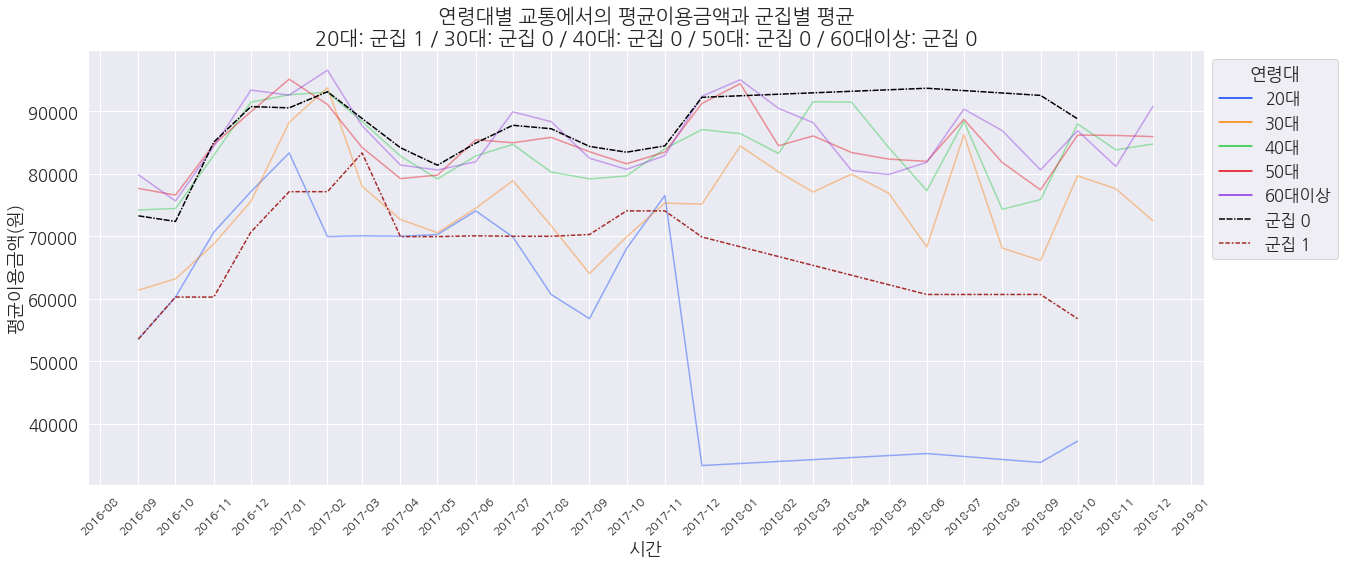

In [ ]:
plot_market_agg(agg_DATA, marketType[0], km_list[0], pred_list[0])

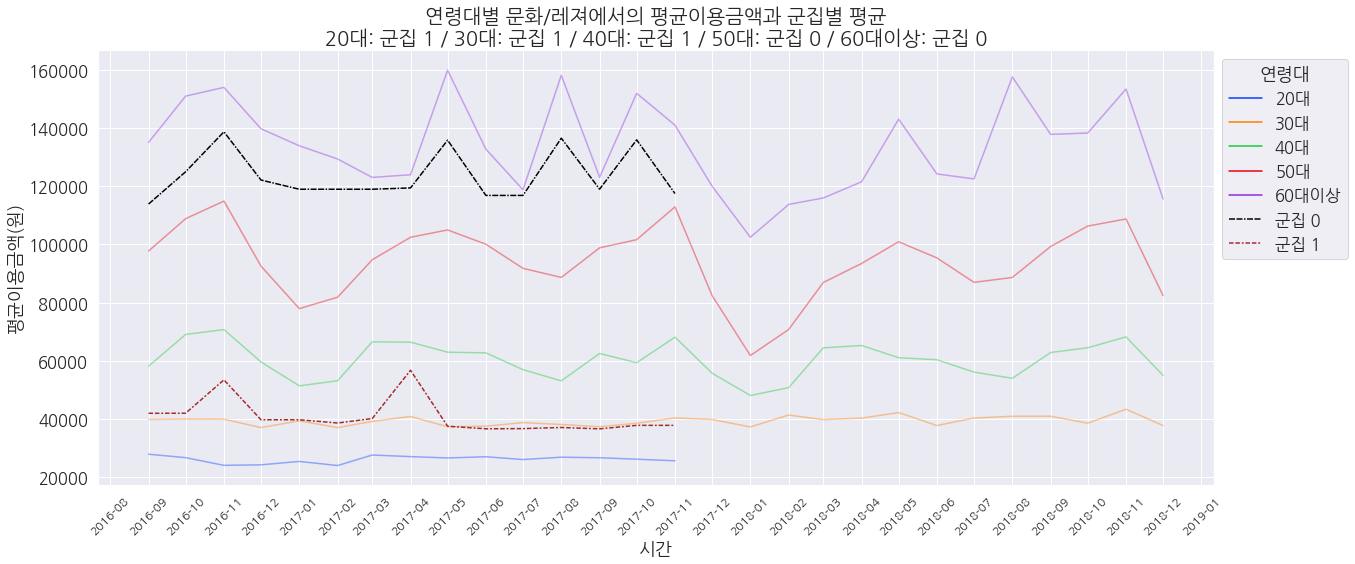

In [ ]:
plot_market_agg(agg_DATA, marketType[1], km_list[1], pred_list[1])

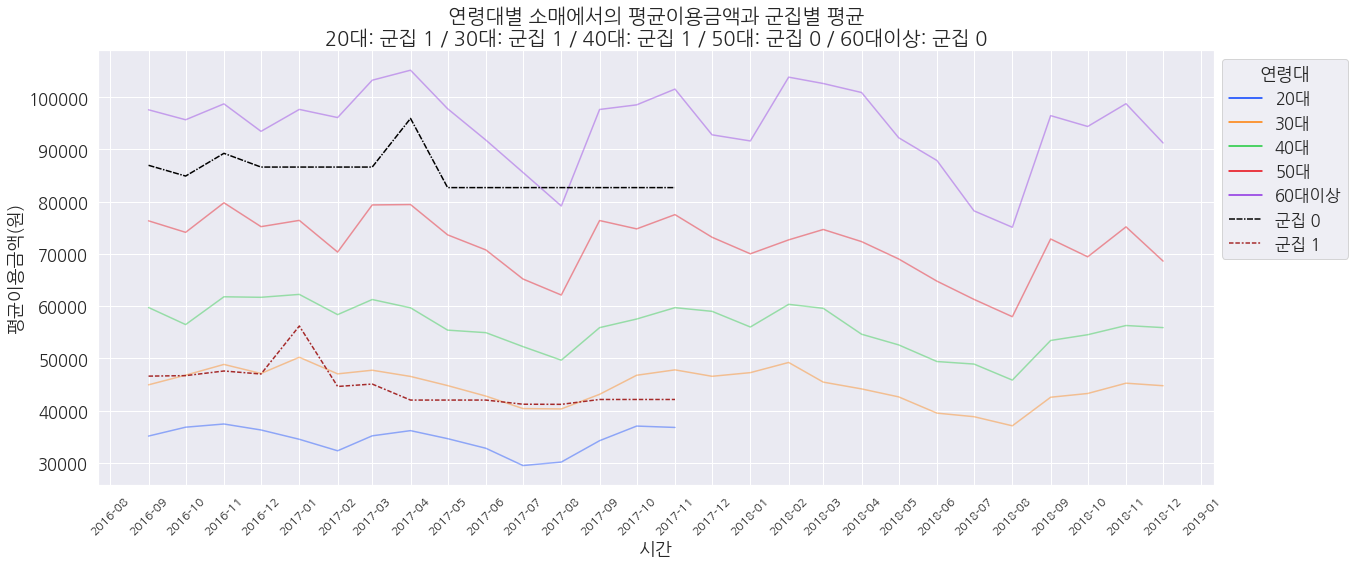

In [ ]:
plot_market_agg(agg_DATA, marketType[2], km_list[2], pred_list[2])

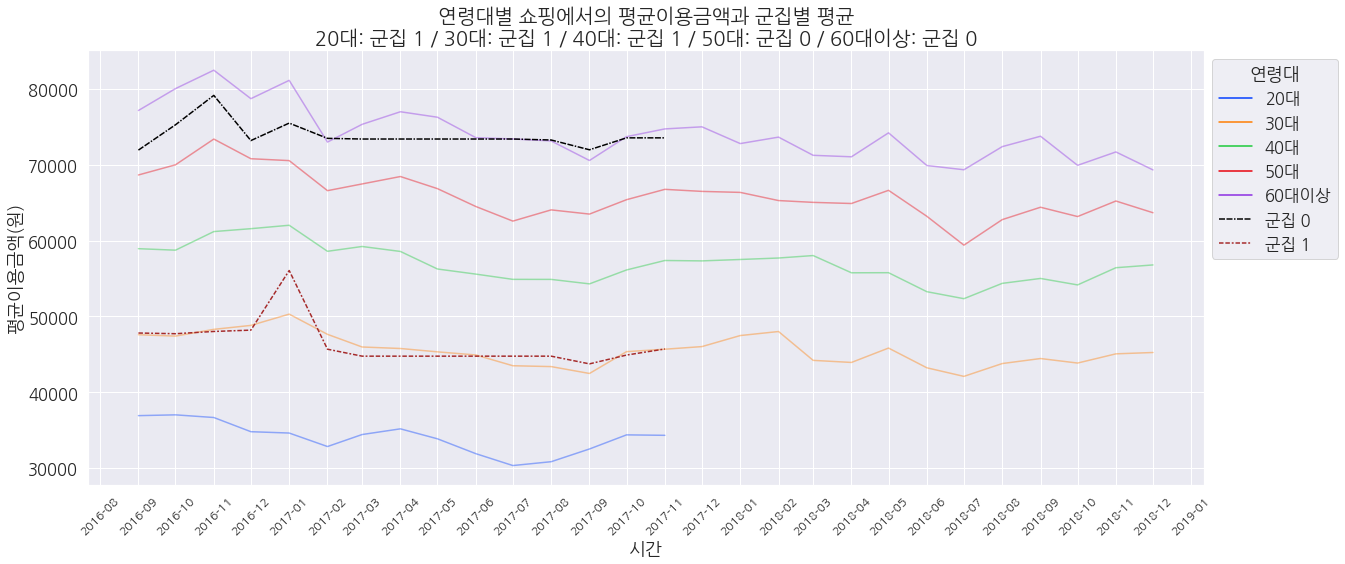

In [ ]:
plot_market_agg(agg_DATA, marketType[3], km_list[3], pred_list[3])

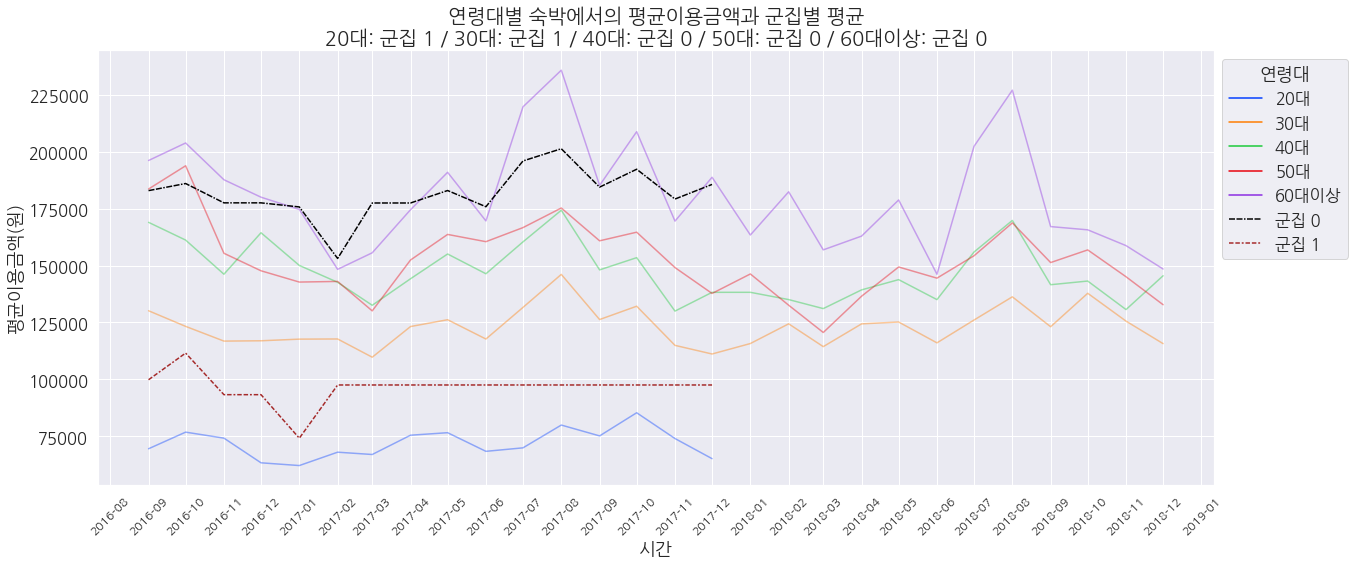

In [ ]:
plot_market_agg(agg_DATA, marketType[4], km_list[4], pred_list[4])

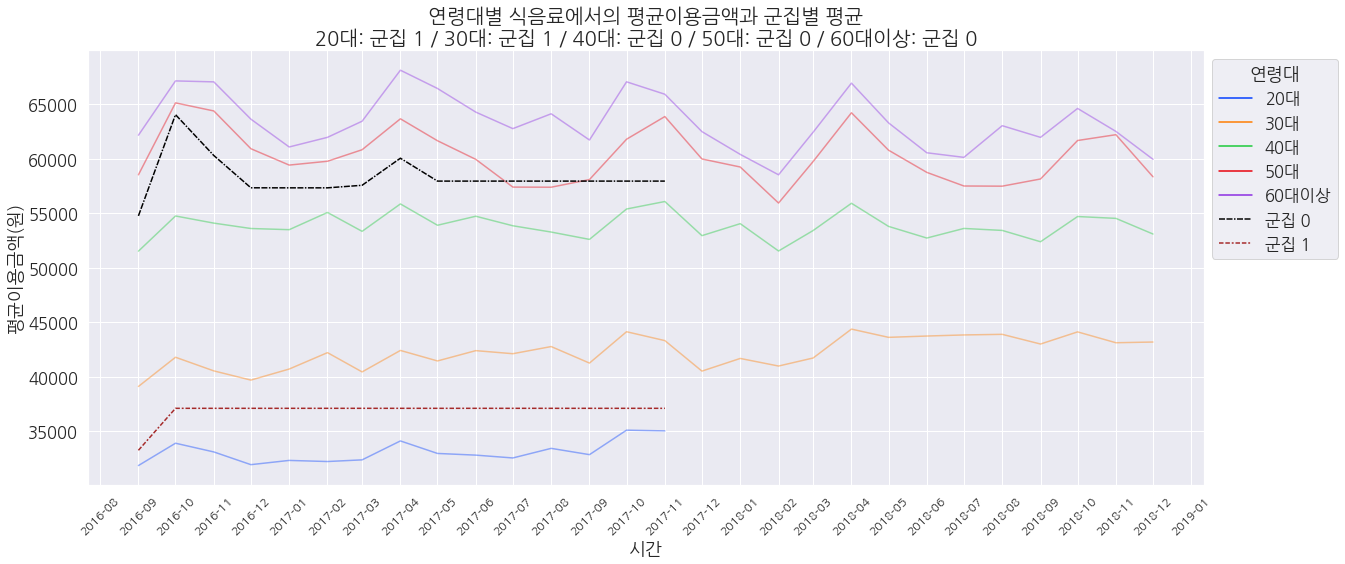

In [ ]:
plot_market_agg(agg_DATA, marketType[5], km_list[5], pred_list[5])

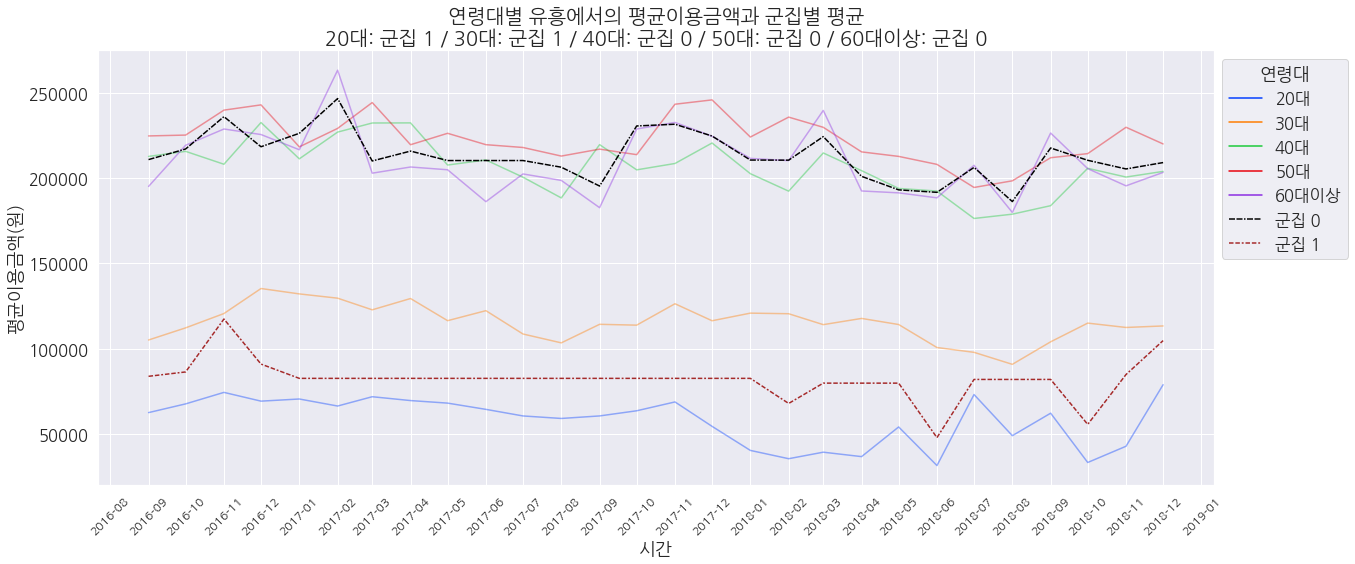

In [ ]:
plot_market_agg(agg_DATA, marketType[6], km_list[6], pred_list[6])

시각화를 통해서 알 수 있듯이 **교통에서는** 20대의 2017년 11월 이후의 급격한 감소를 빼고는 **모든 연령대에서 비슷한 평균이용금액을 갖는다**. 군집화를 통해서는 20대를 빼고 모든 연령대가 같은 군집에 속하는 것을 볼 수 있다. 20대의 데이터가 급격히 감소한 지점 때문에 군집이 따로 잡힌 것으로 간주한다면 모든 연령대가 비슷한  군집에 속한다고 보아도 될 것이다. 또한, 실제로 각 군집의 평균 시계열이 크게 차이가 나지 않는다는 것을 볼 수  있다.

다른 분야에서는 시각화를 통해 확실히 40-60대와 같이 연령대가 높을수록 평균이용금액이 높은 것을 볼 수 있다. 특히나, **식음료와 유흥에서 20-30대와 40-60대가 지출하는 비용이 크게 차이가 난다**는 것을 볼 수 있다. 또한 군집화를 통해서도 식음료와 유흥에서의 군집들이 가장 명확하게 구분이 되는 것을 볼 수 있다. 

시각화 및 군집화의 결과를 정리하자면 **제주도의 내국인관광객들의 경비에서 20-30대가 평균적으로 쓰는 돈이 적음에도 불구하고 교통에서는 20-30대와 40-60대가 비슷한 지출을 한다**고 볼 수 있다.

2021년 제주 방문관광객 실태조사를 통해 알 수 있듯이 73.8%가 렌트카를 빌리기 때문에 **20-30대도 렌트카가 경비의 상당 부분을 차지한다는 것을 유추**해볼 수 있다. 따라서 본 팀은 렌트카에 대안이 주어져 **렌트카 비용을 아낄 수 있다면 20-30대가 교통에서 40-60대와 같은 수준의 비용을 지출하지 않을 수도 있다고 생각을 하였다**.

본 팀은 또한 식음료에서 20-30대와 40-60대가 지출하는 비용이 크게 차이가 난다는 것에 주목을 하였다. 2021년 제주 방문관광색 실태조사에 따르면 **20-30대는 제주도로 여행 오는 이유 중 음식/미식 탐방의 비중이 크기 때문에 만약 20-30대가 렌트카 경비를 줄일 수 있다면, 이러한 경비는 식음료에 쓰일 가능성이 매우 높다고 판단된다**. 이를 통해 식음료에서의 20-30대와 40-60대의 평균이용금액의 차이도 줄일 수 있을 것이며 이는 제주도의 식음료 산업 활성화에 큰 도움이 될 수 있을 것으로 보인다.

## 3. 결론

**20-30대가 렌트카 경비를 줄이면, 20-30대의 식음료 산업에 소비 증진이 가능하다.**

# III. 버스정류장 데이터 분석

**데이터 출처**: https://www.data.go.kr/data/15010850/fileData.do

본 팀은 제주도의 버스정류장 위도, 경도 데이터를 활용하여 버스정류장이 어떻게 분포가 되어있는지 그리고 이에 대한 분석을 하고자 하였다.

## 1. 데이터 전처리

In [ ]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
    # !pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer


# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import folium
from folium.plugins import MarkerCluster, MiniMap

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]


from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import json

In [ ]:
bus_stops = pd.read_csv("/content/drive/MyDrive/Jeju Data Analysis/DATA/bus.csv", encoding='cp949')
bus_stops

정류소아이디      정류소명          경도         위도    위치정보(주변설명)    데이터 기준일자
0     406001167.0    (구)구판장  126.798051  33.329675    세화1리노인회관입구  2022-11-01
1     406001168.0    (구)구판장  126.797879  33.329732    세화1리노인회관입구  2022-11-01
2     405000186.0  (구)삼양검문소  126.600034  33.521022       자연농원 우측  2022-11-01
3     405000185.0  (구)삼양검문소  126.600847  33.520956     조천읍이정표 좌측  2022-11-01
4     406000324.0  (구)중앙파출소  126.560894  33.247598   윤성현내과의원 건너편  2022-11-01
...           ...       ...         ...        ...           ...         ...
4075  405001116.0       흥국사  126.378405  33.452615  납읍방향.용흥3길 입구  2022-11-01
4076  406001766.0       흥덕사  126.876066  33.399128           NaN  2022-11-01
4077  406001767.0       흥덕사  126.876005  33.399031           NaN  2022-11-01
4078  406001055.0     희진주유소  126.873644  33.376610     희진주유소 건너편  2022-11-01
4079  406001056.0     희진주유소  126.874037  33.377568       희진주유소 앞  2022-11-01

[4080 rows x 6 columns]

- 위도, 경도, 정류소 이름 데이터를 추출
- 정류소 위치만을 보여주기 위해 groupby

In [ ]:
loc_data = bus_stops[['위도','경도','정류소명']].drop_duplicates(keep = 'first')
loc_data = bus_stops.groupby(['정류소명'])['위도','경도'].mean()
loc_data = loc_data.reset_index()
loc_data.columns = ['stop_name', 'latitude', 'longitude']
loc_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


stop_name   latitude   longitude
0           거슨새미오름,안돌오름  33.445125  126.756875
1         남원읍 충혼묘지,물영아리  33.360190  126.692170
2      다랑쉬오름 입구(남),손지오름  33.460273  126.817124
3            동문로터리,동문시장  33.513051  126.527502
4         방선문 3차,4차 빌리지  33.487679  126.526468
...                 ...        ...         ...
2176              흙담솔사가  33.258780  126.552337
2177                 흙통  33.262151  126.582590
2178                흥국사  33.452467  126.378073
2179                흥덕사  33.399079  126.876036
2180              희진주유소  33.377089  126.873841

[2181 rows x 3 columns]

## 2. 시각화

### 시각화 1

In [ ]:
# 중심 지정
lat = loc_data['latitude'].mean()
long = loc_data['longitude'].mean()

map_hs = folium.Map((lat, long), zoom_start = 11)
mc = MarkerCluster()

for row in loc_data.itertuples():
    mc.add_child(folium.Marker(location = [row.latitude, row.longitude], popup = row.stop_name))
    map_hs.add_child(mc)

# map_hs.save('./bus_stops.html') 
# 파란색 표시는 한개만 있는 곳
map_hs

제주도의 북쪽과 남쪽에 비해 **동쪽과 서쪽에 버스 정류장이 적은 것**을 볼 수 있다.

### 시각화 2

In [ ]:
data_size = len(loc_data)

# 중심 지정
lat = loc_data['latitude'].mean()
long = loc_data['longitude'].mean()
map = folium.Map(location=[lat, long], zoom_start=11)

for i in range(data_size) : 
    folium.Circle(list(loc_data.iloc[i][['latitude', 'longitude']]),
                  radius=150,
                  color='#32408c', fill_color='#32408c').add_to(map)
map

이 그림을 통해서도 북쪽과 남쪽에 버스정류장이 밀집되어 있는 것에 비해 **동쪽과 서쪽은 버스정류장이 드물게 분포**가 된 것을 볼 수 있다.

## 3. 군집분석

In [ ]:
# 군집 개수 찾기 위해서 위/경도만 포함된 데이터 프레임 만들기
k_data = bus_stops[['위도','경도','정류소명']].drop_duplicates(keep = 'first')
k_data = bus_stops.groupby(['정류소명'])['위도','경도'].mean()
k_data = k_data.reset_index()
k_data.columns = ['stop_name', 'latitude', 'longitude']
del k_data["stop_name"]
k_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


latitude   longitude
0  33.445125  126.756875
1  33.360190  126.692170
2  33.460273  126.817124
3  33.513051  126.527502
4  33.487679  126.526468

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fe347bae250>,
                 estimator=KMeans(n_clusters=19), k=(2, 20))

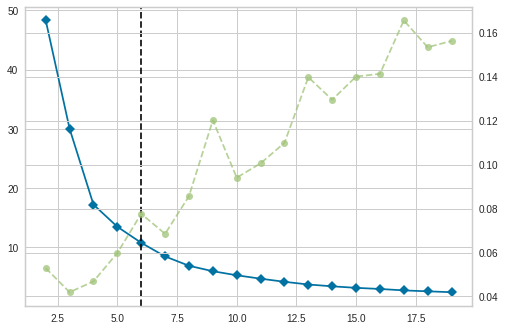

In [ ]:
# 최적의 군집 개수 찾기 -> 6개
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20), timings=True)
visualizer.fit(k_data)

최적의 군집 개수가 6개로 보이나 **본 팀은 제주도의 동, 서, 남, 북 지역의 버스정류장을 군집하는 것에 관심이 있어 4개로 군집 개수를 정하였다.**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=np.random.RandomState(seed=1)).fit(k_data)
labels = kmeans.labels_
centers=kmeans.cluster_centers_

k_data['clustering']=labels
k_data.head()

latitude   longitude  clustering
0  33.445125  126.756875           2
1  33.360190  126.692170           2
2  33.460273  126.817124           2
3  33.513051  126.527502           1
4  33.487679  126.526468           1

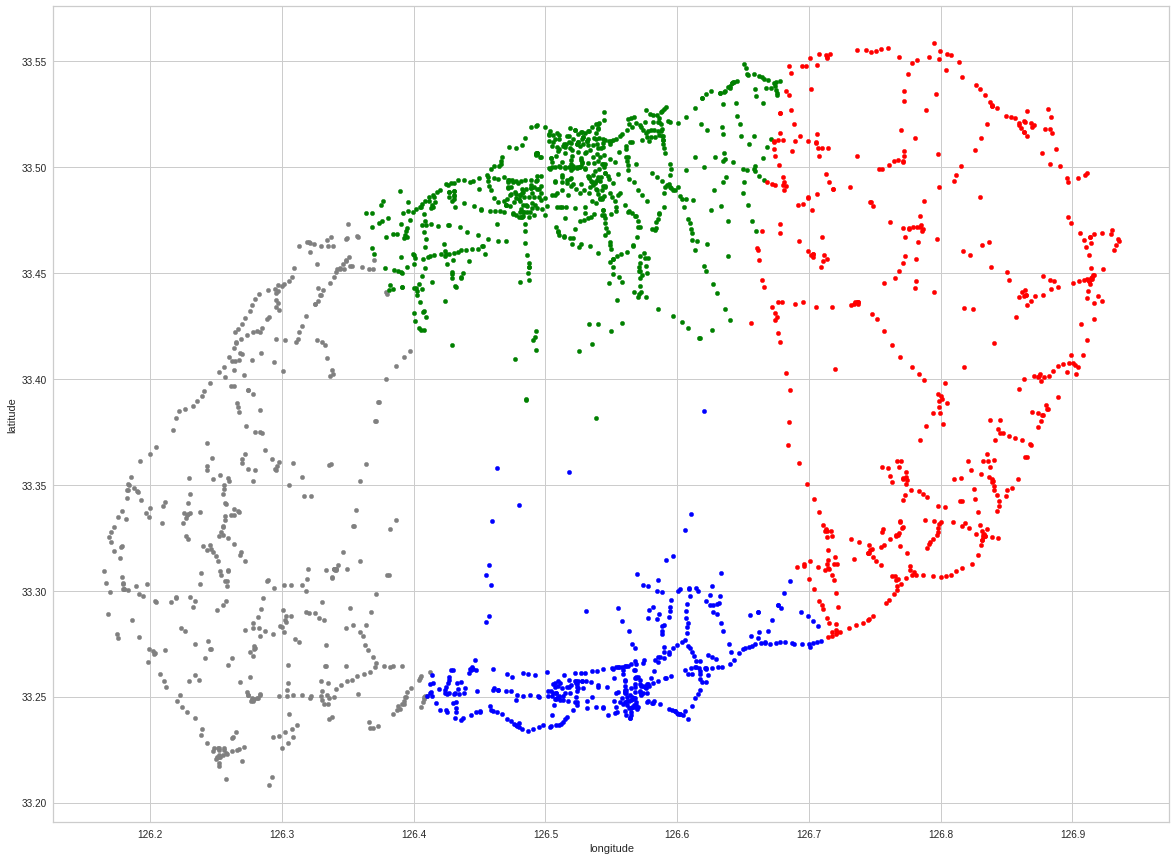

In [ ]:
# 군집 시각화
fig, ax = plt.subplots(figsize=(20, 15))

df_temp = k_data[k_data['clustering']==0]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color='Grey')
df_temp = k_data[k_data['clustering']==1]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color='Green')
df_temp = k_data[k_data['clustering']==2]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color='Red')
df_temp = k_data[k_data['clustering']==3]
df_temp.plot.scatter(x='longitude', y='latitude', ax=ax, color='Blue')

In [ ]:
for i in range(4) : 
    print("군집", i, ":", len(k_data.loc[k_data['clustering'] == i]),"개")

군집 0 : 491 개
군집 1 : 748 개
군집 2 : 519 개
군집 3 : 423 개


초록색으로 표시된 군집 1은 제주도의 **북쪽**에 해당하는 지역으로 **크기가 동쪽과 서쪽의 군집들보다 작음에도 불구하고 버스정류장 수가 748개로 가장 많다**.

파란색으로 표시된 군집 3은 제주도의 **남쪽**에 해당하는 지역으로 **크기가 동쪽과 서쪽의 군집들보다 비교적 작으며 버스정류장의 수도 가장 적지만 동쪽과 서쪽의 군집들과 크게 차이가 나지 않는다**.

회색으로 표시된 군집 0은 제주도의 **서쪽**, 빨간색으로 표시된 군집 2는 제주도의 **동쪽**으로 이 두 군집 모두 군집 1과 군집 3에 비해 **크기가 매우 크지만 버스정류장 수는 크기에 비해서 많다고 할 수 없다**.

정리하자면, 군집 분석을 통해서 제주도의 **버스정류장이 동쪽과 서쪽 지역에 부족하다**는 것을 알 수 있다.

## 4. 결론

**제주도의 동쪽과 서쪽 지역에 버스정류장이 부족하다.**

# IV. 렌트카 이동경로 데이터 분석


**데이터 출처**: https://www.jejudatahub.net/data/view/data/1201

제주도 관광객들의 렌트카 이동경로를 시각화하기 위해 Jeju datahub에서 제공하는 ["월별 렌터카 위치정보"](https://www.jejudatahub.net/data/view/data/1201)(2020~2021년 데이터)를 수집하였다.

##1. 데이터 수집 및 전처리

데이터 수집일이 매일이 아닌 매주 토요일인 특징이 있다.



데이터는 ID('oid'), 시간('collection_dt'), 위도('latitude'), 경도('longitude')를 변수로 가진다.

아래 데이터는 2021년 12월 데이터로, 365만개의 상당히 많은 관측치가 존재한다.

In [ ]:
data

oid      collection_dt   longitude   latitude
0        46100025  20211211101230306  126.567619  33.250907
1        46100025  20211211101300685  126.567854  33.251120
2        46100025  20211211101330157  126.567711  33.253192
3        46100025  20211211101400036  126.568542  33.254537
4        46100025  20211211101430868  126.571925  33.254784
...           ...                ...         ...        ...
3656235  46101bc2  20211225194330255  126.792046  33.305817
3656236  46101bc2  20211225194400884  126.792046  33.305807
3656237  46101bc2  20211225194430169  126.791123  33.306085
3656238  46101bc2  20211225194530786  126.791502  33.305906
3656239  46101bc2  20211225194630013  126.791173  33.305931

[3656240 rows x 4 columns]

본 팀은 시간상 전체 데이터를 이용하여 시각화는 하지 않기로 하였다. 따라서 2020년 봄(3~5월)과 2021년 12월 데이터를 시각화하였다.

In [ ]:
#시각화 패키지
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
from tqdm.notebook import tqdm

In [ ]:
#2020년 봄 데이터 전처리
loc2003 = pd.read_csv('data/loc2003.csv')
loc2004 = pd.read_csv('data/loc2004.csv')
loc2005 = pd.read_csv('data/loc2005.csv')

loc_spr=pd.concat([loc2003,loc2004, loc2005])
loc_spr=loc_spr[(loc_spr['latitude']<35)|(loc_spr['longitude']<130)] #outlier 제거 
loc_spr.sort_values(by=['oid','collection_dt'], inplace=True) #id, 시간별 정렬

loc_spr=loc_spr.astype({'collection_dt':'str'})
loc_spr['collection_dt']=loc_spr['collection_dt'].str[:8] #시간 데이터 변형(시,분,초 삭제)

id_spr=pd.DataFrame(loc_spr.groupby('oid').size().nlargest(100)).reset_index()['oid'] #상위 100개 id
id_spr=id_spr[id_spr!='0c0000fd'] #이상값 제거
id_spr=id_spr[id_spr!='00000000'] #이상값 제거
id_spr=pd.Series.to_numpy(id_spr)

date_spr=loc_spr['collection_dt'].unique() #날짜 추출
loc_spr=loc_spr[loc_spr['oid'].isin(id_spr)] #상위 100개 자료만 저장
loc_spr.reset_index(drop=True, inplace=True) #인덱스 초기화

##2. 시각화

In [ ]:
#시각화
center=[33.3616666, 126.5291666]
m1 = folium.Map(location=center, zoom_start=11)
for i in range(99):
  x=loc_spr[loc_spr['oid']==id_spr[i]][['collection_dt','latitude','longitude']]
  groups=x.groupby(['collection_dt'])
  result=dict(list(groups))
  for j in range(len(date_spr)):
      try:
        y=pd.concat([result[date_spr[j]][['latitude']], result[date_spr[j]][['longitude']]], axis = 1)
        folium.PolyLine(locations=y, opacity=0.01, color='purple').add_to(m1)
      except:
        pass

In [ ]:
#2020년 봄(3~5월) 시각화
m1

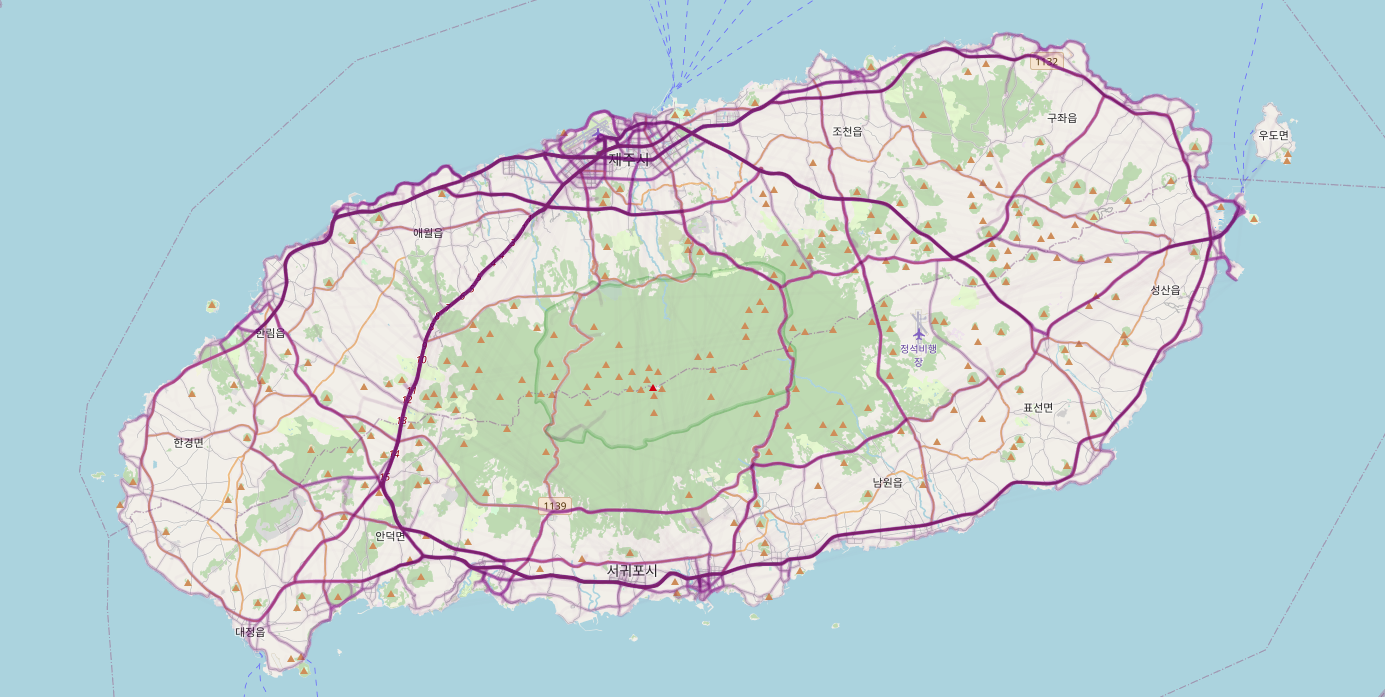

In [ ]:
#2021년 12월 시각화
m2

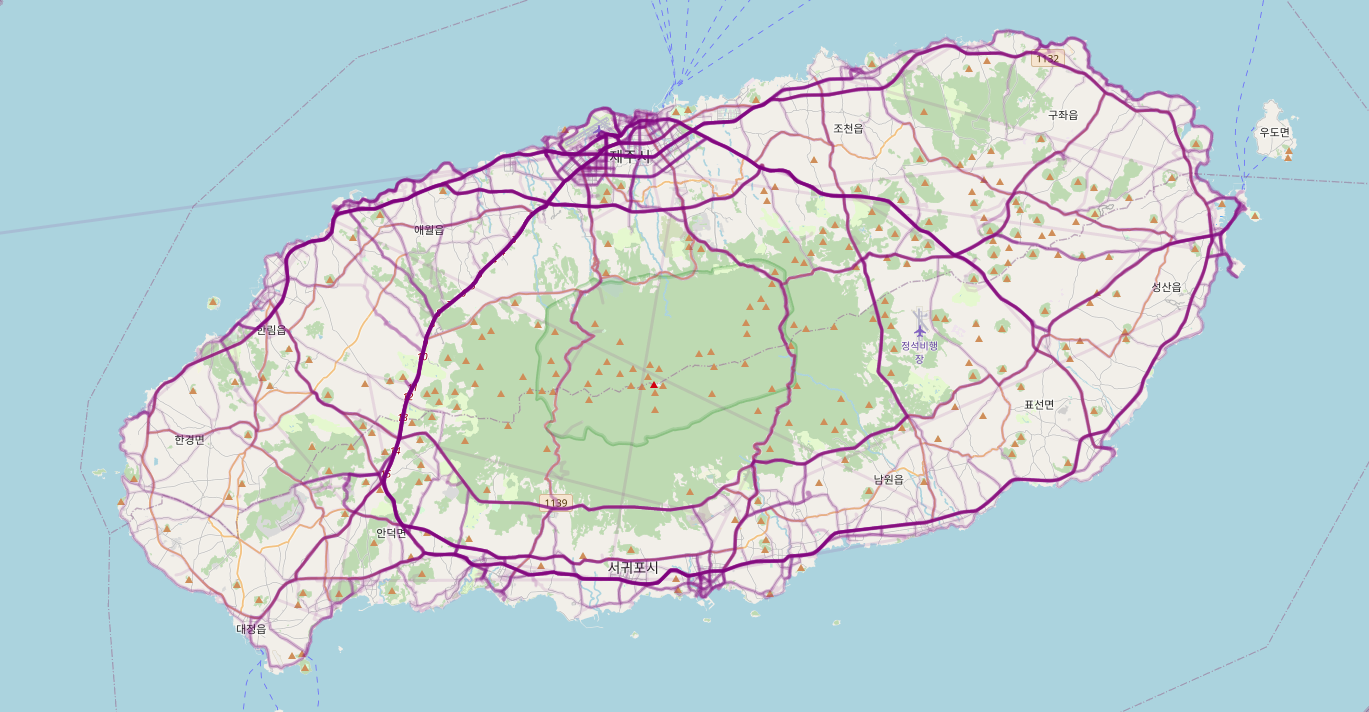

2020년 봄, 2021년 12월 데이터를 시각화 해본 결과, 경로상의 큰 차이가 없음을 알 수 있다. 따라서 어떠한 시각화 결과를 사용해도 될 것 같다고 판단하였다.
    
**이용자가 많은 경로는 진하게**, 그렇지 않은 경로는 연하게 표시가 되어있다.

공항 주변과 해안선을 따르는 경로의 이용빈도가 높음을 알 수 있다. 한라산을 가로지르는 경로 또한 이용빈도가 높은데, 이는 제주시 <-> 서귀포시 이동시 최단 경로를 이용하기 때문으로 보인다. 서쪽 경로는 관광객이 많지 않지만, **동쪽 경로는 관광객이 많은 것을 알 수 있다**.


##3. 결론

**렌트카를 이용해 동쪽을 방문하는 관광객이 많다.**

# V. 제주도 맛집 데이터 분석

**데이터 출처:** https://www.data.go.kr/data/15049999/fileData.do

본 팀은 제주도의 음식점들의 위도와 경도 및 그들에 대한 평가지표들을 통해 맛집들을 시각화하여 이들이 어디에 분포가 많이 되어있는지와 렌트카 이동 경로와 어디가 겹치는지 등을 파악하고자 하였다.

## 1. 데이터 전처리

In [ ]:
# 데이터 분석 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
import folium
from folium.plugins import MarkerCluster, MiniMap

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/jeju/

/content/drive/MyDrive/jeju


In [ ]:
contents_2022 = pd.read_csv("data/2022_contents.csv", encoding='cp949')
contents_2022.head()

콘텐츠ID 콘텐츠분류       제목  언어   타이틀SEO 연관콘텐츠  \
0  CNTS_000000000021903    숙박     해피펜션  국문     해피펜션   NaN   
1  CONT_000000000501391   음식점   탐라 뚝배기  국문   탐라 뚝배기   NaN   
2  CONT_000000000501249   음식점  민봉태중화요리  국문  민봉태중화요리   NaN   
3  CONT_000000000501081    숙박    천상의노을  국문    천상의노을   NaN   
4  CNTS_000000000018301   음식점     우유부단  국문     우유부단   NaN   

                         지번주소                       도로명주소         위도  \
0      제주특별자치도 제주시 외도2동 317-1          제주특별자치도 제주시 월대1길 4  33.494110   
1    제주특별자치도 서귀포시 표선면 표선리 879  제주특별자치도 서귀포시 표선면 표선백사로 127  33.326770   
2  제주특별자치도 제주시 연삼로 776 (화북이동)  제주특별자치도 제주시 연삼로 776 (화북이동)  33.511550   
3  제주특별자치도 제주시 애월읍 신엄리 2839-1   제주특별자치도 제주시 애월읍 애월해안로 424  33.473861   
4   제주특별자치도 제주시 한림읍 금악리 142-2     제주특별자치도 제주시 한림읍 금악동길 38  33.347640   

           경도  ... 번체공개여부  말레이어공개여부 번체모바일사용여부  말어모바일사용여부    번체승인일시  말레이어승인일시  \
0  126.433780  ...    NaN       NaN       NaN        NaN       NaN       NaN   
1  126.836690  ...      y       NaN         y        NaN  19/09/11       NaN   
2  126.568780  ...      y       NaN         y        NaN  19/09/11       NaN   
3  126.353201  ...      y       NaN         y        NaN  19/11/20       NaN   
4  126.328260  ...      n       NaN         y        NaN       NaN       NaN   

   번체번역요청일시  말레이어번역요청일시  번체SEO자동여부  말레이어SEO자동여부  
0       NaN         NaN        NaN          NaN  
1  19/09/11         NaN          y          NaN  
2  19/09/11         NaN          y          NaN  
3  19/11/20         NaN          y          NaN  
4  19/02/25         NaN          n          NaN  

[5 rows x 69 columns]

In [ ]:
contents_2022.columns

Index(['콘텐츠ID', '콘텐츠분류', '제목', '언어', '타이틀SEO', '연관콘텐츠', '지번주소', '도로명주소', '위도',
       '경도', '탐나오연동여부', '평점', 'SNSURL', '조회수', '외부검색어', '좋아요수', '리뷰수', '북마크수',
       '일정등록수', '다녀왔어요수', 'PC사용여부', '모바일사용여부', '공개여부', '작성상태', '사용여부',
       '작성상태_1', '영문PC사용여부', '중문PC사용여부', '일문PC사용여부', '영문공개여부', '중문공개여부',
       '일문공개여부', '영문모바일사용여부', '중문모바일사용여부', '일문모바일사용여부', '영문승인일시', '중문승인일시',
       '일문승인일시', '등록자', '등록일시', '수정자', '수정일시', 'SNS공유수', '인기점수', '우편번호',
       '템플릿여부', '번역요청일시', '영문번역요청일시', '중문번역요청일시', '일문번역요청일시', '페이지SEO자동여부',
       '영문페이지SEO자동여부', '중문페이지SEO자동여부', '일문페이지SEO자동여부', '사진공유수', '번체PC사용여부',
       '말레이어PC사용여부', '번체작성상태', '말레이어작성상태', '번체공개여부', '말레이어공개여부', '번체모바일사용여부',
       '말어모바일사용여부', '번체승인일시', '말레이어승인일시', '번체번역요청일시', '말레이어번역요청일시',
       '번체SEO자동여부', '말레이어SEO자동여부'],
      dtype='object')

In [ ]:
# 쓸만한 컬럼만 추출
con_2022 = contents_2022[["콘텐츠분류", "제목", "언어", "지번주소", "도로명주소", "위도", "경도", "평점", "조회수", "좋아요수", 
                  "리뷰수", "북마크수", "SNS공유수", "인기점수"]].copy()
# 결측치 확인
con_2022.isnull().sum()

콘텐츠분류        0
제목           1
언어           0
지번주소       527
도로명주소      620
위도         656
경도         656
평점        1929
조회수          0
좋아요수         0
리뷰수          0
북마크수         0
SNS공유수       0
인기점수       324
dtype: int64

**전처리 1) 결측치 확인 및 처리**

In [ ]:
# 제목
con_2022[con_2022['제목'].isnull()]

콘텐츠분류   제목  언어                     지번주소                  도로명주소  \
2754   음식점  NaN  국문  제주특별자치도 제주시 이도2동 1962-8  제주특별자치도 제주시 신설로9길 8-1   

             위도         경도  평점  조회수  좋아요수  리뷰수  북마크수  SNS공유수    인기점수  
2754  33.496986  126.53534 NaN  677     0    0     1       0  1354.0

In [ ]:
# 지번주소 확인 결과 돈가스 가게
con_2022["제목"].fillna("촵촵", inplace=True)

In [ ]:
# 평점 NAN 삭제
con_2022 = con_2022.dropna(axis=0)

In [ ]:
con_2022.isnull().sum()

콘텐츠분류     0
제목        0
언어        0
지번주소      0
도로명주소     0
위도        0
경도        0
평점        0
조회수       0
좋아요수      0
리뷰수       0
북마크수      0
SNS공유수    0
인기점수      0
dtype: int64

In [ ]:
con_2022.head()

콘텐츠분류        제목  언어                       지번주소                       도로명주소  \
4   음식점      우유부단  국문  제주특별자치도 제주시 한림읍 금악리 142-2     제주특별자치도 제주시 한림읍 금악동길 38   
5   관광지       공천포  국문       제주특별자치도 서귀포시 남원읍 신례리        제주특별자치도 서귀포시 남원읍 신례리   
6   관광지  민오름(조천읍)  국문  제주특별자치도 제주시 조천읍 선흘리 산 141   제주특별자치도 제주시 조천읍 선흘리 산 141   
7   관광지    제주빅볼랜드  국문    제주특별자치도 제주시 애월읍 어음리 산 3     제주특별자치도 제주시 애월읍 산록서로 15   
9   음식점   땅꼬분식 뷔페  국문  제주특별자치도 제주시 조천읍 조천리 686-2  제주특별자치도 제주시 조천읍 조천18길 50-9   

          위도          경도   평점    조회수  좋아요수  리뷰수  북마크수  SNS공유수     인기점수  
4  33.347640  126.328260  5.0  18164    10   38   204       5  36548.0  
5  33.267690  126.645996  4.0   2761     0    9    15       0   5567.0  
6  33.474840  126.495027  4.0   2371     0    2     2       0   4752.0  
7  33.365943  126.356440  5.0  28217     4    2   128      21  56456.0  
9  33.537205  126.645424  3.0   3037     0    1    12       2   6079.0

**전처리 2) 언어가 국문인것만 뽑기**

In [ ]:
kor_con_2022 = con_2022[con_2022.언어.str.contains('국문')].reset_index(drop=True)
kor_con_2022.head()

콘텐츠분류        제목  언어                       지번주소                       도로명주소  \
0   음식점      우유부단  국문  제주특별자치도 제주시 한림읍 금악리 142-2     제주특별자치도 제주시 한림읍 금악동길 38   
1   관광지       공천포  국문       제주특별자치도 서귀포시 남원읍 신례리        제주특별자치도 서귀포시 남원읍 신례리   
2   관광지  민오름(조천읍)  국문  제주특별자치도 제주시 조천읍 선흘리 산 141   제주특별자치도 제주시 조천읍 선흘리 산 141   
3   관광지    제주빅볼랜드  국문    제주특별자치도 제주시 애월읍 어음리 산 3     제주특별자치도 제주시 애월읍 산록서로 15   
4   음식점   땅꼬분식 뷔페  국문  제주특별자치도 제주시 조천읍 조천리 686-2  제주특별자치도 제주시 조천읍 조천18길 50-9   

          위도          경도   평점    조회수  좋아요수  리뷰수  북마크수  SNS공유수     인기점수  
0  33.347640  126.328260  5.0  18164    10   38   204       5  36548.0  
1  33.267690  126.645996  4.0   2761     0    9    15       0   5567.0  
2  33.474840  126.495027  4.0   2371     0    2     2       0   4752.0  
3  33.365943  126.356440  5.0  28217     4    2   128      21  56456.0  
4  33.537205  126.645424  3.0   3037     0    1    12       2   6079.0

언어가 국문인 관광지에 대한 분석을 실시하고자 국문으로 적인 열들만 추출했다.

**EDA)**

In [ ]:
contents_2022['콘텐츠분류'].value_counts()

음식점      1593
관광지      1382
숙박       1254
테마여행      518
축제/행사     297
쇼핑        164
기타          3
Name: 콘텐츠분류, dtype: int64

제주도의 총 1593개의 음식점의 데이터가 있다.

In [ ]:
kor_con_2022['평점'].value_counts().sort_index(ascending=False)

5.0    1208
4.0     379
3.0     165
2.0       2
1.0       7
0.0     762
Name: 평점, dtype: int64

**5점과 0점인 평점이 많은 쌍봉분포(bimodal distribution)인 것을 볼 수 있다.**

## 2. 시각화

본 팀은 **20-30대가 주로 음식/미식 탐방에 관심**이 있기 때문에 **음식점들과 그들의 평가지표들을 다루기**로 하였다. 제주도에서 **맛집**으로 알려진 가게들을 다루기 위해 **평점이 5점인 가게들만** 다루고자 한다.

In [ ]:
food = kor_con_2022[kor_con_2022['콘텐츠분류']=='음식점']
food = food[food['평점'] == 5.0].reset_index(drop=True)  # 평점이 5인 가게만
food.head(10)

콘텐츠분류           제목  언어                       지번주소  \
0   음식점         우유부단  국문  제주특별자치도 제주시 한림읍 금악리 142-2   
1   음식점         골막식당  국문     제주특별자치도 제주시 이도이동 362-1   
2   음식점        늘봄흑돼지  국문     제주특별자치도 제주시 노형동 2343-3   
3   음식점  쉬림프봉봉&올레파머스  국문  제주특별자치도 제주시 구좌읍 월정리 523-1   
4   음식점         웅스키친  국문     제주특별자치도 제주시 이호2동 116-3   
5   음식점      바다위에코끼리  국문   제주특별자치도 제주시 한림읍 협재리 1695   
6   음식점         채원일식  국문     제주특별자치도 제주시 이도2동 314-6   
7   음식점    저팔계깡통연탄구이  국문   제주특별자치도 제주시 조천읍 함덕리 1271   
8   음식점     살랑살랑샤브샤브  국문    제주특별자치도 제주시 용담3동 1026-9   
9   음식점    이성필 커피볶는집  국문    제주특별자치도 제주시 이도2동 광양8길 1   

                       도로명주소         위도          경도   평점    조회수  좋아요수  리뷰수  \
0    제주특별자치도 제주시 한림읍 금악동길 38  33.347640  126.328260  5.0  18164    10   38   
1         제주특별자치도 제주시 천수로 12  33.502465  126.538467  5.0   3899     2    2   
2        제주특별자치도 제주시 고사마루길 6  33.479290  126.472880  5.0   5592     3    4   
3    제주특별자치도 제주시 구좌읍 월정7길 57  33.555250  126.795820  5.0   2686     0    4   
4       제주특별자치도 제주시 대동길 17-1  33.493074  126.463770  5.0   4138     0    9   
5  제주특별자치도 제주시 한림읍 협재1길 27-6  33.499622  126.531190  5.0   3079     0    2   
6        제주특별자치도 제주시 가령골2길 4  33.504257  126.537544  5.0   1543     0    2   
7    제주특별자치도 제주시 조천읍 신북로 531  33.541700  126.666756  5.0   1115     0    1   
8       제주특별자치도 제주시 서해안로 612  33.488773  126.495310  5.0   1090     0    1   
9    제주특별자치도 제주시 이도2동 광양8길 1  33.499733  126.527970  5.0    713     0    1   

   북마크수  SNS공유수     인기점수  
0   204       5  36548.0  
1    43       4   7814.0  
2    39       1  11213.0  
3     5       0   5392.0  
4    32       0   8321.0  
5    12       0   6168.0  
6     0       0   3096.0  
7    12       0   2235.0  
8     7       0   2185.0  
9     2       0   1431.0

전에 봤듯이 평점이 5점인 가게가 많다. 하지만 같은 평점 5여도 차이가 있을 수 있다. 따라서 본 팀은 **평점 5점 내에서 인기점수 순대로 순위를 매기기로 하였다**.

In [ ]:
top_food = food.sort_values('인기점수', ascending=False).reset_index(drop=True)
top_food.head()

콘텐츠분류              제목  언어                        지번주소  \
0   음식점            봄날카페  국문    제주특별자치도 제주시 애월읍 애월리 2540   
1   음식점  서연의집(영화 건축학개론)  국문   제주특별자치도 서귀포시 남원읍 위미리 2975   
2   음식점            춘심이네  국문  제주특별자치도 서귀포시 안덕면 창천리 160-4   
3   음식점           애월더선셋  국문    제주특별자치도 제주시 애월읍 곽지리 1381   
4   음식점            우유부단  국문   제주특별자치도 제주시 한림읍 금악리 142-2   

                           도로명주소         위도          경도   평점    조회수  좋아요수  \
0       제주특별자치도 제주시 애월읍 애월로1길 25  33.462460  126.309590  5.0  53442    41   
1      제주특별자치도 서귀포시 남원읍 위미해안로 86  33.269413  126.655876  5.0  32563    13   
2  제주특별자치도 서귀포시 안덕면 창천중앙로24번길 16  33.264789  126.370777  5.0  24018     7   
3      제주특별자치도 제주시 애월읍 일주서로 6111  33.456004  126.308908  5.0  20825     9   
4        제주특별자치도 제주시 한림읍 금악동길 38  33.347640  126.328260  5.0  18164    10   

   리뷰수  북마크수  SNS공유수      인기점수  
0  141   523      50  107712.0  
1   66   207      16   65495.0  
2   31   245       8   48212.0  
3   24   141       5   41797.0  
4   38   204       5   36548.0

In [ ]:
import folium

# 중심 지정

jeju_map = folium.Map(location=[33.3616666, 126.5291666], zoom_start=11)

for i in range(0, 440, 1):


  folium.Marker([top_food.iloc[i][5], top_food.iloc[i][6]], popup=top_food.iloc[i][0], icon=folium.Icon(color="red")).add_to(jeju_map)


# jeju_map.save('jeju.html')

jeju_map

In [ ]:
import folium

# 중심 지정

jeju_map = folium.Map(location=[33.3616666, 126.5291666], zoom_start=11)
marker_cluster = MarkerCluster().add_to(jeju_map)

for i in range(0, 440, 1):
  folium.Marker([top_food.iloc[i][5], top_food.iloc[i][6]], popup=top_food.iloc[i][0], icon=folium.Icon(color="red")).add_to(jeju_map)


# jeju_map.save('jeju.html')

jeju_map


# Folium 지도 객체 생성
m = folium.Map(location=[lat_c, lon_c], zoom_start=10, tiles='OpenStreetMap')
marker_cluster = MarkerCluster().add_to(m)

folium.Choropleth(
    geo_data=geo,
    data=code_df,
    columns=['읍면동','방문인구'],
    nan_fill_color='grey',
    nan_fill_opacity=0.3,
    key_on='feature.properties.EMD_NM',
    fill_opacity=0.4,
    fill_color='YlGn'
    ).add_to(m)

for _, row in place_df.iterrows():
    lat, lon = row['위도'], row['경도']
    folium.Marker(
    location=[lat,lon],
    popup =row['관광지명'],
    icon = folium.Icon(color="green"),
    ).add_to(marker_cluster)
m

본 팀은 위와 같이 총 440개의 맛집(평점이  5점)들을 시각화하였다. 그 결과 **주로 해안가 근처에 맛집들이 분포가 되어있음**을 볼 수 있다. **특히 북쪽과 남쪽, 그리고 동쪽**에 맛집들이 많이 분포가 되어있다. 하지만 **서쪽과 동남쪽에는 맛집들이 많이 분포가 되어있다고 하기는 힘들어 보인다**.

## 3. 결론

**서, 동남쪽을 제외한 모든 지역(특히 해안가)에 맛집이 고루 분포하고 있다.**

# VI. 결론

## 1. 데이터 분석 결과 정리

본 팀은 I. 내국인관광객 카드 데이터 분석을 통해 모든 연령대에서 교통에 쓰이는 비용의 수준은 큰 차이가 없음을 알 수 있었다. 하지만 식음료에서 20-30대와 40-60대의 지출비용 수준의 차이가 크다는 것도 볼 수 있었다. 2021년 제주 방문관광객 실태조사에 따르면 20-30대는 음식/미식 탐방에 매우 관심이 있다고 한다. 따라서 본 팀은 20-30대의 교통비 부담을 줄인다면 식음료의 소비를 증진시킬 수 있다고 판단한다.

본 팀은 2021년 제주 방문관광객 실태조사를 참고하여 렌트카 이용 비중이 상당히 높은 점에 주목하였다. 최근 뉴스에 따르면 렌트카 비용은 점점 높아져 가는데 관광객들이 왜 렌트카를 이용할 수 밖에 없는지를 알고자 하였다. 이를 위해 먼저 III. 버스정류장 데이터 분석을 수행하였다. 그 결과 제주도의 동, 서쪽에 버스정류장이 부족함을 알 수 있었다. 또한 군집화를 통해 동, 서쪽에서 군집된 지역의 면적이 매우 넓은것에 비해 버스정류장의 수가 적은 것을 알 수 있었다.

다음으로 IV. 렌트카 이동경로 데이터분석을 통해 관광객들이 렌트카를 이용하여 동쪽에 많이 방문한다는 것을 알 수 있었다. 2021년 제주 방문관광객 실태조사에 따르면 20-30세대가 맛집 탐방에 높은 관심을 가지고 있다. 따라서 렌트카 이용의 주목적 중 하나가 맛집 방문을 위함일 것으로 판단하여 본 팀은 V. 제주도 맛집 데이터 분석을 실시하였다. 그 결과, 서, 동남쪽을 제외한 대부분의 지역에 맛집이 고루 분포함을 알 수 있었다.

III. 버스정류장 데이터 분석에 따르면 제주도의 동, 서쪽에 버스정류장이 부족하다는 것을 알 수 있는데 V. 제주도 맛집 데이터 분석에 의하면 동쪽에 맛집들이 많이 있음을 알 수 있다. 따라서 버스정류장이 부족한 동쪽은 관광객들이 대중교통을 활용하여 해당 지역 맛집을 방문하기 어려울 수 있을 것으로 보인다. 이는 IV.렌트카 이동경로 데이터 분석에서 렌트카를 통해 동쪽으로 이동하는 관광객이 많은 원인으로도 볼 수 있을 것이다.

## 2. 활용방안 및 기대효과

이와 같은 분석 결과를 통해 본 팀은 동, 서쪽(특히 동쪽)의 버스정류장 개편의 필요성을 제시한다. 제주도에서 대중교통 제도의 개편의 필요성을 인지하고 꾸준히 개선 방안에 대한 논의가 있었으나 현재까지도 큰 발전은 없는 것으로 보인다(참고자료 2~6). 이에 본 팀은 동, 서쪽(특히 동쪽)의 버스정류장 개편의 필요성을 강조하며 앞으로의 개편에 도움이 되기를 기대한다.

본 팀은 이러한 대중교통 제도 개편은 20-30대의 대중교통 이용의 활성화를 기대한다. 이는 여행경비에서 교통비가 차지하는 부담을 줄여주고 이를 통해 20-30대의 식음료의 소비를 증진시켜 제주도의 식음료 산업의 활성화로 이어질 것으로 기대한다.

# 참고자료

1. [2021년 제주특별자치도 방문관광객 실태조사](https://ijto.or.kr/korean/Bd/view.php?btable=pds&pds_skin=&bno=356&p=1&lcate=)(제주관광공사)

2. [‘더 빠르게, 더 편리하게, 더 저렴하게’ 확 달라진 <제주 대중교통체계 전면 개편>](https://www.visitjeju.net/kr/detail/view?contentsid=CNTS_000000000022500#)(비싯제주)

3. [‘준공영’ 제주 버스 구조조정 용역 중단…내년초 시행 어려울듯](https://www.hani.co.kr/arti/area/jeju/1062190.html)(한겨례, 허호준 기자)

4. [제주 195개 버스 노선 모두 적자…효율적 환승시스템 구축해야](https://www.jejunews.com/news/articleView.html?idxno=2184772)(제주일보, 김승범 기자)

5. [[친절한K] 도입 5년 차 제주 버스 준공영제 실태는?](https://news.kbs.co.kr/news/view.do?ncd=5306493)(KBS)

6. [제주, 버스 준공영제 성과평가.개선 용역 중지...이유는?](https://www.headlinejeju.co.kr/news/articleView.html?idxno=498063)(헤드라인제주, 홍창빈 기자)

본 저장물의 저작권은 Apache License v2.0을 따릅니다